In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
train_dataset = pd.read_csv('trainHousePrice.csv')
test_dataset = pd.read_csv('testHousePrice.csv')
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
train_dataset.shape

(1460, 81)

In [23]:
train_dataset.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

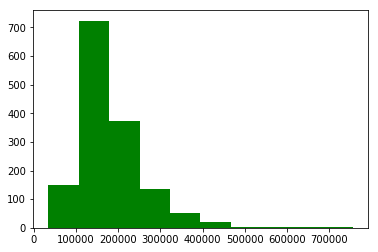

In [5]:
plt.hist(train_dataset.SalePrice, color='green')

(1460,)
(1460,)
0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


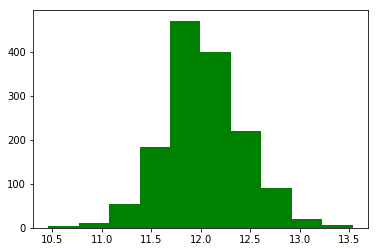

In [19]:
label = np.log(train_dataset.SalePrice)
plt.hist(label, color='green')


In [27]:
numeric_features = train_dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [41]:
corr = numeric_features.corr()
#print(corr['SalePrice'].shape)
#print(corr['SalePrice'].sort_values(ascending=False))
#print(' ')
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(' ')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])


(38,)
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: 

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390
(10, 1)


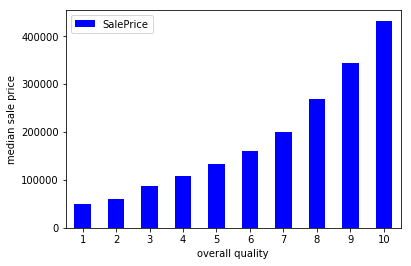

In [43]:
quality_pivot = train_dataset.pivot_table(index = 'OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('overall quality')
plt.ylabel('median sale price')
plt.xticks(rotation=0)
print(quality_pivot)
print(quality_pivot.shape)

Text(0.5, 0, 'Above grade (ground) living area square feet')

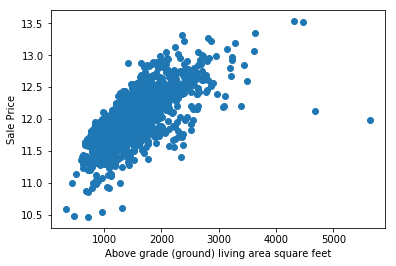

In [45]:
plt.scatter(x=train_dataset['GrLivArea'], y=np.log(train_dataset['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')

Text(0.5, 0, 'garage area')

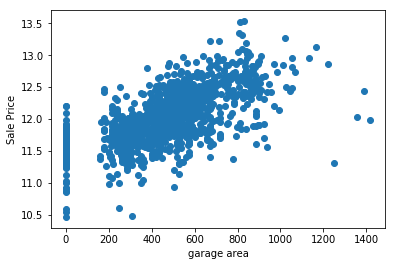

In [46]:
plt.scatter(x=train_dataset['GarageArea'], y=np.log(train_dataset['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('garage area')

Text(0.5, 0, 'garage area')

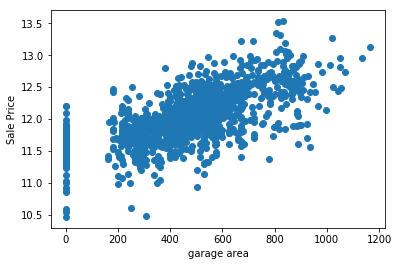

In [47]:
train_dataset = train_dataset[train_dataset['GarageArea']<1200]
plt.scatter(x=train_dataset['GarageArea'], y=np.log(train_dataset['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('garage area')

In [53]:
nulls = pd.DataFrame(train_dataset.isnull().sum().sort_values(ascending=False))[:25]
nulls.columns = ['null count']
nulls.index.name = 'Feature'
nulls

,null count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [57]:
categoricals = train_dataset.select_dtypes(exclude=[np.number])
print(categoricals)
categoricals.describe()

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave   NaN  

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [56]:
train_dataset['enc_street'] = pd.get_dummies(train_dataset.Street, drop_first = True)
test_dataset['enc_street'] = pd.get_dummies(test_dataset.Street, drop_first = True)
print('Encoded: \n')
print(train_dataset.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


In [60]:
#the interpolate function fills every N/A spaces with the median of the rest data
data = train_dataset.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)

0

In [61]:
y = np.log(train_dataset.SalePrice)
x = data.drop(['SalePrice', 'Id'], axis=1)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [72]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)


In [73]:
print("R^2 is: \n", model.score(x_test, y_test))
predictions = model.predict(x_test)
print("RMSE is: \n", mean_squared_error(y_test, predictions))

R^2 is: 
 0.8703640899237441
RMSE is: 
 0.02199223498991864


Text(0.5, 1.0, 'Linear Regression model')

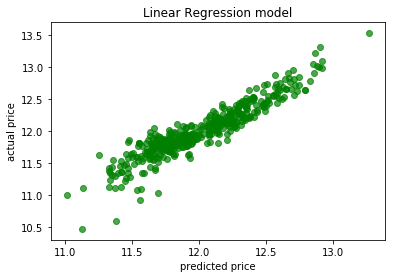

In [74]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color='green')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('Linear Regression model')

In [80]:
submission = pd.DataFrame()
submission['Id'] = test_dataset.Id
feats = test_dataset.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predicts = model.predict(feats)
final_predicts = np.exp(predicts) #exp because np.log for labels were used to train model
print('Original predictions are: \n', predicts[:5], '\n')
print('final predictions are: \n', final_predicts[:5])
submission['SalePrice'] = final_predicts
submission.head()

Original predictions are: 
 [11.67519369 11.68005038 12.03330896 12.18493951 12.10439456] 

final predictions are: 
 [117617.56774986 118190.18945016 168267.28304477 195817.72035267
 180664.06021339]


,Id,SalePrice
0,1461,117617.567750
1,1462,118190.189450
2,1463,168267.283045
3,1464,195817.720353
4,1465,180664.060213


In [81]:
submission.to_csv('submission1.csv', index=False)